Veri Ön İşleme

Neden veri ön işleme gerekli?
* Makine öğrenme algoritmalarının çoğu (özellikle mesafe tabanlı ve lineer modeller) özelliklerin  ölçeklerinden etkilenir.
* Bazı modeller (örneğin KNN, SVM, LogisticRegression, SGD, SVR, MLP) düzgün çalışmak için ölçeklenmiş veri ister.
* Decision Tree ve Random Forest gibi modeller ise ölçeklendirmeden pek etkilenmez.

Öğreneceklerimiz:
1. StandardScaler (Z-normalizasyonu)
* Her özelliği ortalamayı 0, std sapmayı 1 yapar.
* Dağılım normal ise tercih edilir.
* En çok kullanılandır.

2. MinMaxScaler
* Verileri 0-1 aralığına sıkıştırır.
* Dağılım normal değilse ya da dışlama istenmiyorsa güzel bir çözümdür.
* Özellikle sinir ağlarında popülerdir.

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Veri setini yükle
data = fetch_california_housing()
X = data.data
y = data.target

# Eğitim ve test setine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline: Ölçekleme + Model
pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline.fit(X_train, y_train)

# Tahmin yap ve başarıya bak
y_pred = pipeline.predict(X_test)
print("R2 Skoru (StandardScaler):", r2_score(y_test, y_pred))

R2 Skoru (StandardScaler): 0.575787706032451


Şimdi aynı veriyi bu kez MinMaxScaler() ile ölçeklendirelim ve modelin performansını karşılaştıralım. Bu şekilde ölçeklendirme türlerinin model performansına etkisini görelimç

In [5]:
from sklearn.preprocessing import MinMaxScaler

#Pipeline: MinMaxScaler + LinearRegression
pipeline_minmax = make_pipeline(MinMaxScaler(), LinearRegression())
pipeline_minmax.fit(X_train, y_train)

#tahmin ve degerlendirme
y_pred_minmax = pipeline_minmax.predict(X_test)

print("R2 Skoru (MinMaxScaler):", r2_score(y_test, y_pred))

R2 Skoru (MinMaxScaler): 0.575787706032451


Sonuçlar model ve veri setine göre değişebilir ama genel fikir şudur:
* Veriler normal dağılıma yakınsa => StandardScaler daha iyi sonuç verir.
* Verilerın dağılımı dengesizse ya da dış değerler varsa => MinMaxScaler daha istikrarlı olabilir.

Bizim sonuçlar:
* Verilerin ölçeklenme yönteminden etkilenmeyecek kadar dengeli bir dağılıma sahip olduğu anlamına gelir.
* Linear Regression gibi ölçeklemeye duyarlı bir modelde bile bu fark oluşmadıysa muhtemelen özellikler zaten benzer ölçektedir.

Makine Öğrenmesi, sayıları sever ama veri setlerimizde bazen "şehir", "renk", "cinsiyet" gibi kategorik (yazısal) veriler olur. Bu aşamada LabelEncoder ve OneHotEncoder devreye giriyor.

LabelEncoder - Etiketleme Yöntemi
* Her kategoriye tek bir sayı verir.
* Örnek: ["kadın", "erkek", "diğer"] => [0, 1, 2]
* Genellikle hedef değişken (y) için kullanılır.
* Özellikler için doğrudan kullanmak yanıltıcı olabilir çünkü modeller sayısal büyüklüğü önemser.

In [7]:
from sklearn.preprocessing import LabelEncoder

cinsiyet = ["kadin", "erkek", "kadin", "diger", "erkek"]
le = LabelEncoder()
cinsiyet_encoded = le.fit_transform(cinsiyet)

print("Kodlanmis:", cinsiyet_encoded)
print("Siralama:", list(le.classes_))

Kodlanmis: [2 1 2 0 1]
Siralama: ['diger', 'erkek', 'kadin']


OneHotEncoder - One-Hot Kodlama
* Her kategoriye ayrı bir sütun açar.
* Örnek: ["kırmızı", "mavi", "yeşil"] => kırmızı = [1, 0, 0], mavi = [0, 1, 0], yeşil = [0, 0, 1]
* Özellik sütunları (X) için idealdir.

In [9]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

renk = np.array([["kirmizi"], ["mavi"], ["kirmizi"], ["yesil"]])
ohe = OneHotEncoder(sparse_output = False)
renk_encoded = ohe.fit_transform(renk)

print("One-Hot Encoded:\n", renk_encoded)
print("Sutunlar:", ohe.get_feature_names_out())

One-Hot Encoded:
 [[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
Sutunlar: ['x0_kirmizi' 'x0_mavi' 'x0_yesil']


Ne zaman hangisini kullanmalıyız?
| Kullanım Durumu                | Uygun Dönüştürücü                                              |
| ------------------------------ | -------------------------------------------------------------- |
| **Y hedef değişken**           | `LabelEncoder`                                                 |
| **X özellik sütunları (kat.)** | `OneHotEncoder`                                                |
| Çok sayıda kategori varsa      | `OneHotEncoder(drop='first')` kullanılarak boyut azaltılabilir |


Feature Engineering Nedir?

Feature Engineering, verideki ham bilgileri alıp:
* Daha anlamlı,
* Daha ayırt edici,
* Modelin işini kolaylaştıracak yeni özellikler üretmektir.

Neden Önemli?

Makine öğrenmesinde modelin başarısı,
* %80 veriye, %20 modele bağlıdır.
* Yani veriyi güzel hazırlarsak sıradan bir model bile harikalar yaratabilir.

Feature Engineering Türleri
1. Yeni Özellik Üretimi
* Var olan özelliklerden yeni bilgiler üretme
* Örn: Yaş / Gelir, Fiyat / Oda Sayısı, Yıl - Doğum Yılı = Yaş
2. Binning (Aralıklandırma)
* Sürekli değerleri kategorilere dönüştürme
* Örn: Yaş - Genç, Yetişkin, Yaşlı
3. Etiket Kodlama (Label Encodeing)
* Kategorik değişkenleri sayıya çevirme
* Örn: Meslek - 0, 1, 2, 3...
4. Tekrar Sayımı (Frequency Encodeing)
* Bir kategori verisinin veri setinde kaç kez geçtiğini özelliğe çevirme
5. Datetime Özellikleri Ayıklama
* Tarihten yıl, ay, gün, hafta içi gibi bilgiler çıkarma
6. Text Features (NLP içinde)
* Karakter/kelime sayısı, TF-IDF, n-gramlar, sentiment skorları vb.

In [10]:
import pandas as pd

df = pd.DataFrame({
    'fiyat': [100000, 150000, 120000],
    'oda': [2, 3, 2]
})

#m^2 basina fiyat uretelim
df['fiyat_oda_basi'] = df['fiyat'] / df['oda']

print(df)

    fiyat  oda  fiyat_oda_basi
0  100000    2         50000.0
1  150000    3         50000.0
2  120000    2         60000.0


Ne zaman yapılır?
* Modelleme öncesinde yapılır.
* Ama Pipeline içinde de yapılabilir. (özellikle özel transformerlarla)

Model Kalibrasyonu
* Özellikle olasılık tahmini yapan sınıflandırma modelleri için çok önemli bir aşamadır.
* Modelin sadece doğru sınıfı tahmin etmesi değil, ne kadar emin olduğunu da düzgün ifade etmesi gerekir. İşte bunun için kalibrasyon devreye girer.

Model Kalibrasyonu Nedir?
* Bazı modeller tahmin sonucunda olasılık değerleri verir (örneğin: %80 ihtimalle 1. sınıf). Ama bu olasılıklar bazen aşırı güvenli ya da aşırı temkinli olabilir. Kalibrasyon bu tahminleri gerçek gözlemlerle hizzalamayı sağlar.
* Örneğin:
  * Model "%90 ihtimalle pozitif" dediği örneklerde gerçekten % 90 pozitif çıkıyor mu?
    * Eğer çıkmıyorsa modelin çıktıları kalibre değildir.
    
Neden Önemlidir?
* Tıp, finans, kredi gibi alanlarda doğru olasılık tahmini çok kritiktir.
* "Bu kişi %70 ihtimalle hastadır" demek, "Hasta" demekten daha hassas ve değerlidir.
* Özellikle:
  * LogisticRegression
  * SVC (probability=True)
  * RandomForest
 
 gibi modellerde kalibrasyon fark yaratır.

Scikit-Learn ile Kalibrasyon

1. CalibratedClassifierCV (en yaygın yöntem)

In [13]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import brier_score_loss
from sklearn.datasets import make_classification

#veriyi olustur
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

#egitim test veriyi bol
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#model ve kalibrasyon
base_model = LogisticRegression()
calibrated_model = CalibratedClassifierCV(base_model, cv=5)

calibrated_model.fit(X_train, y_train)
probs = calibrated_model.predict_proba(X_test)[:,1]

#brier skoru (ne kadar iyi kalibre edilmis)
print('Brier Skoru:', brier_score_loss(y_test, probs))

Brier Skoru: 0.1149678114072376


Kalibrasyon Eğrisi (Reliability Curve)

Modelin kalibrasyon durumu grafik ile incelenebilir.
* Doğru kalibre edilmiş modellerin eğrisi y = x çizgisine yakın olur.

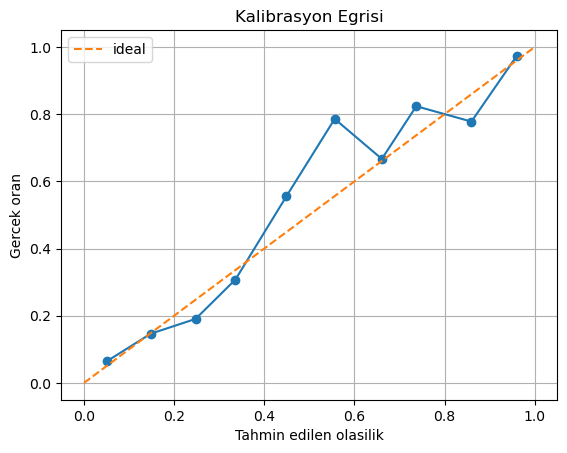

In [14]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

true_probs, pred_probs = calibration_curve(y_test, probs, n_bins=10)

plt.plot(pred_probs, true_probs, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--', label='ideal')
plt.xlabel("Tahmin edilen olasilik")
plt.ylabel("Gercek oran")
plt.title("Kalibrasyon Egrisi")
plt.legend()
plt.grid()
plt.show()

Yukarıdaki kalibrasyon eğrisi ve Brier skoru şunları ifade ediyor.

Yorumlar:
* Kalibrasyon Eğrisi: Grafik, tahmin edilen olasılıklar(x) ile gerçekleşen oranları(y) karşılaştırır.
  * Eğri kesikli turuncu çizgiye (mükkemmel kalibrasyon çizgisi) ne kadar yakınsa, modelin tahmin ettiği olasılıklar gerçek olasılıkları o kadar iyi yansıtır.
  * Eğri çok sapmıyorsa model iyi kalibre edilmiştir.
* Brier Skoru: 0.1149 gibi düşük bir değer çıktı.
  * Bu, modelin olasılık tahminlerinin doğruya oldukça yakın olduğunu gösterir.
  * Brier skoru 0'a ne kadar yakınsa o kadar iyidir.

Kullanılan Yöntemler
| Yöntem               | Açıklama                                                              |
| -------------------- | --------------------------------------------------------------------- |
| **Sigmoid**          | Logistic Regression benzeri eğriyle düzeltir.                         |
| **Isotonic**         | Serbest, monoton artan eğri. Daha esnektir ama daha fazla veri ister. |
| **Platt Scaling**    | Logistic regression ile kalibrasyon (sigmoid).                        |
| **Beta Calibration** | Olasılık dağılımını beta fonksiyonu ile düzeltir (ileri düzey).       |

Aşağıda kalibrasyon karşılaştırması yapacağız.

Log-loss (kalibrasyonsuz): 0.08275508360411982
Log-loss (sigmoid): 0.08238214499859457
Log-loss (isotonic): 0.537034051944052


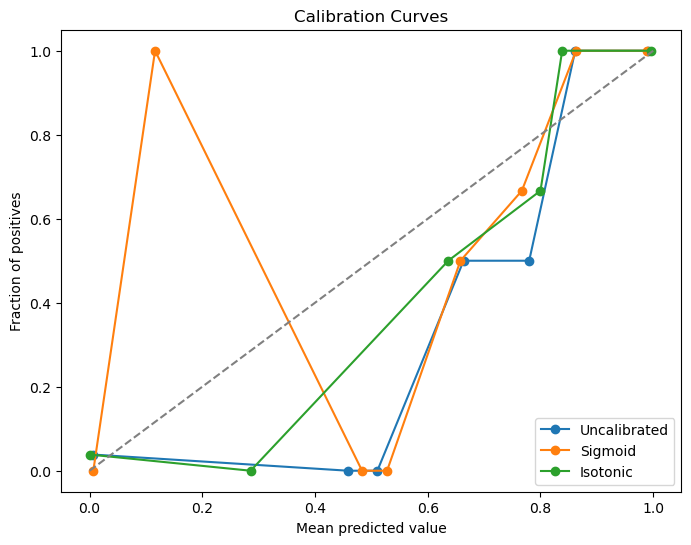

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import log_loss, brier_score_loss
import matplotlib.pyplot as plt

# Veri seti
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

# Kalibrasyonsuz model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
probs_uncalibrated = model.predict_proba(X_test)[:,1]

# Kalibrasyon sigmoid (Platt scaling)
calibrated_sigmoid = CalibratedClassifierCV(model, method='sigmoid', cv='prefit')
calibrated_sigmoid.fit(X_train, y_train)
probs_sigmoid = calibrated_sigmoid.predict_proba(X_test)[:,1]

# Kalibrasyon isotonic
calibrated_isotonic = CalibratedClassifierCV(model, method='isotonic', cv='prefit')
calibrated_isotonic.fit(X_train, y_train)
probs_isotonic = calibrated_isotonic.predict_proba(X_test)[:,1]

# Log-loss karşılaştırması
print("Log-loss (kalibrasyonsuz):", log_loss(y_test, probs_uncalibrated))
print("Log-loss (sigmoid):", log_loss(y_test, probs_sigmoid))
print("Log-loss (isotonic):", log_loss(y_test, probs_isotonic))

# Kalibrasyon eğrisi çizimi
plt.figure(figsize=(8,6))

for probs, label in zip([probs_uncalibrated, probs_sigmoid, probs_isotonic],
                        ['Uncalibrated', 'Sigmoid', 'Isotonic']):
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, probs, n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label=label)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curves')
plt.legend()
plt.show()


Log-loss Sonuçlarımız:
| Model              | Log-loss Değeri |
| ------------------ | --------------- |
| Kalibrasyonsuz     | 0.08276         |
| Sigmoid Kalibreli  | 0.08238 ✅       |
| Isotonic Kalibreli | 0.53703 ❌       |

Yorumlar:
* Sigmoid, az ama anlamlı bir gelişme sağlamış. Bu yöntemin Logistic Regression'la uyumlu çalıştığı bilinir çünkü Logistic Regression zaten sigmoid temelli tahmin yapar.
* Isotonic, log-loss açısından kötü sonuç verdi. Bu genelde:
  * Eğitim verisinde aşırı uyum (overfitting) olduğunda,
  * Veya veri seti küçük olduğunda görülür.
  * Ayrıca isotonic çok esnek bir yöntem olduğu için bazı durumlarda modelin güvenirliğini bozabilir.
  
Ne yapabiliriz?
* Daha fazla veriyle isotonic kalibrasyon daha iyi sonuç verebilir.
* Başka modellerle (örneğin: RandomForest, SVM) aynı deneyi yaparsak kalibrasyonun etkisini karşılaştırabiliriz.
* Kalibrasyon sonrası sadece log-loss değil Brier Score, ROC AUC gibi farklı metriklere de bakabiliriz.

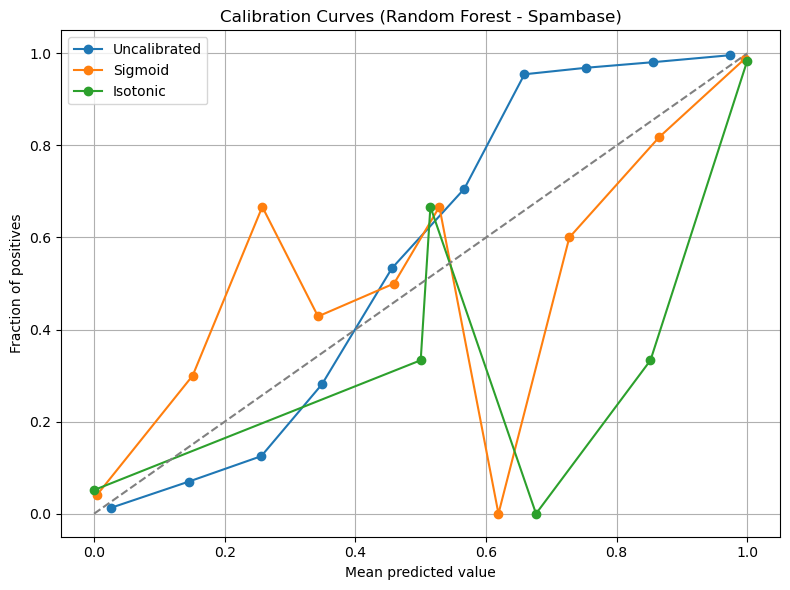

🔢 Log Loss Sonuçları:
Uncalibrated: 0.1932
Sigmoid: 0.1833
Isotonic: 1.3431

🌧️ Brier Score Sonuçları:
Uncalibrated: 0.0414
Sigmoid: 0.0370
Isotonic: 0.0415


In [18]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, brier_score_loss
import matplotlib.pyplot as plt

# 📥 1. Veri setini yükle
X, y = fetch_openml("spambase", version=1, return_X_y=True, as_frame=False, parser='auto')

# 🧼 2. Etiketleri sayısal tipe dönüştür
y = y.astype(int)

# ✂️ 3. Eğitim-test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 4. Kalibrasyonsuz RandomForest modeli
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
probs_uncalibrated = rf_model.predict_proba(X_test)[:, 1]

# 🔁 5. Sigmoid kalibrasyon
rf_sigmoid = CalibratedClassifierCV(rf_model, method='sigmoid', cv='prefit')
rf_sigmoid.fit(X_train, y_train)
probs_sigmoid = rf_sigmoid.predict_proba(X_test)[:, 1]

# 🔀 6. Isotonic kalibrasyon
rf_isotonic = CalibratedClassifierCV(rf_model, method='isotonic', cv='prefit')
rf_isotonic.fit(X_train, y_train)
probs_isotonic = rf_isotonic.predict_proba(X_test)[:, 1]

# 📉 7. Log-loss ve Brier Score sonuçları
log_loss_results = {
    "Uncalibrated": log_loss(y_test, probs_uncalibrated),
    "Sigmoid": log_loss(y_test, probs_sigmoid),
    "Isotonic": log_loss(y_test, probs_isotonic)
}

brier_score_results = {
    "Uncalibrated": brier_score_loss(y_test, probs_uncalibrated),
    "Sigmoid": brier_score_loss(y_test, probs_sigmoid),
    "Isotonic": brier_score_loss(y_test, probs_isotonic)
}

# 📈 8. Kalibrasyon eğrisi çizimi
plt.figure(figsize=(8, 6))
for probs, label in zip([probs_uncalibrated, probs_sigmoid, probs_isotonic],
                        ['Uncalibrated', 'Sigmoid', 'Isotonic']):
    frac_pos, mean_pred = calibration_curve(y_test, probs, n_bins=10)
    plt.plot(mean_pred, frac_pos, marker='o', label=label)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curves (Random Forest - Spambase)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔎 9. Sonuçları yazdır
print("🔢 Log Loss Sonuçları:")
for k, v in log_loss_results.items():
    print(f"{k}: {v:.4f}")

print("\n🌧️ Brier Score Sonuçları:")
for k, v in brier_score_results.items():
    print(f"{k}: {v:.4f}")


Şimdi Random Forest modeliyle Spambase veri seti (spam e-posta verileri) üzerinde yapılan kalibrasyon karşılaştırması sonuçlarına bakalım.

Log-loss Sonuçları
| Model            | Log Loss ↓                          |
| ---------------- | ----------------------------------- |
| **Uncalibrated** | 0.1932                              |
| **Sigmoid**      | **0.1833** ✅ *(En iyi)*             |
| **Isotonic**     | 1.3431 ❌ *(Çok kötü kalibre olmuş)* |

Yorum:
* Log-loss, modelin olasılık tahminlerinin ne kadar "kesin" ve doğru olduğuna bakar.
  * Daha düşük log-loss = daha iyi kalibrasyon
* Sigmoid Kalibrasyon, en iyi sonucu vermiş. Yani modelin tahmin olasılıklarını daha doğru haşe getirmiş.
* Isotonic, bu veri setinde aşırı uyumlanmış (overfitting yapmış olabilir), bu yüzden log-loss çok kötü.

Brier Score Sonuçları
| Model            | Brier Score ↓   |
| ---------------- | --------------- |
| **Uncalibrated** | 0.0414          |
| **Sigmoid**      | **0.0370** ✅    |
| **Isotonic**     | 0.0415        ❌ |

Yorum:
* Brier skoru, olasılıkların ne kadar uzak olduğunu ölçer. Log-loss'a göre daha naziktir ama yine "düşük" olması iyidir.
* Sigmoid yine en iyisi çünkü daha doğru olasılık tahminleri veriyor.
* Isotonic, burada da kötü sonuç veriyor. Bu da bize isotonic'in bu veri seti ve model için uygun olmadığını gösteriyor.

Genel Değerlendirme:
* Sigmoid kalibrasyon, hem log loss hem de brier score açısından net en iyi yöntem olmuş.
* Isotonic, bu örnekte Random Forest + Spambase kombinasyonuyla uygun çalışmamış, muhtemelen aşırı uyum (overfitting) yapmış.
* Bu sonuçlar bize gösteriyor ki: her veri setinde her kalibrasyon yöntemi iyi sonuç vermez. Her durumu denemek gerekir.

Imbalanced Dataset Handling

Problem:
* Bir sınıf (örneğin 1) diğerine göre çok azsa, model genellikle hep çoğunluk sınıfı (0) tahmin eder ve doğruluk yüksek görünse bile başarısız bir model ortaya çıkar.

Çözüm 1:
* Scikit-Learn modellerinde, nadir sınıflara daha fazla önem vermesi için ağırlık atayabiliriz.
* 'balanced' dersek, sınıfların frekansına göre otomatik olarak ağırlık verir.
* Alternatif olarak class_weight={0:1, 1:5} gibi elle ağırlık da verebiliriz.
* Bu yöntem modelin ceza sistemini değiştirerek nadir sınıfları daha fazla "önemsemesini" sağlar.

In [3]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')

Çözüm 2: SMOTE (Synthetic Minority Oversampling Technique)
* SMOTE, azınlık sınıfı için sentetik örnekler üreterek veriyi dengeler.
* Bu işlem sonucunda azınlık sınıfın örnek sayısı, çoğunlukla eşitlenmiş olur.
* imblearn kütüphanesindendir. (pip install imbalanced-learn gerekebilir.)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

#eğitim verisi oluştur
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#SMOTE uygula
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

class_weight vs. SMOTE
| Özellik             | `class_weight`              | `SMOTE`                     |
| ------------------- | --------------------------- | --------------------------- |
| Yöntem              | Modelin cezasını değiştirir | Veriye sentetik örnek ekler |
| Hafıza              | Az kullanır                 | Daha fazla bellek tüketir   |
| Aşırı Uydurma Riski | Daha az                     | Daha fazla olabilir         |
| Destek              | Çoğu model destekler        | Ek kütüphane gerekir        |


Custom Scorer ve Metric Tanımlamak

Neden Özek Skor Tanımlarız?
* Bazı durumlarda accuracy, f1, recall, precision gibi hazır metrikler ihtiyacımızı karşılamayabilir. Örneğin:
  * Bir sınıfı yanlış tahmin etmek çok daha önemliyse (örneğin hasta kişiyi sağlıklı zannetmek.)
  * Regresyonda özel bir iş kuralı varsa
  * Modeli kendi özel koşullarına göre değerlendirmek istiyorsak.

Classification için Custom Scorer Örneği
* Scikit-learn'ün make_scorer fonksiyonuyla kendi metrik fonksiyonumuzu skorlama fonksiyonuna çevirebiliriz.

Örneğin: F2-Score (Recall Ağırlıklı)

In [11]:
from sklearn.metrics import make_scorer, fbeta_score

f2_scorer = make_scorer(fbeta_score, beta=2)

Bu f2_scorer, GridSearchCV gibi fonksiyonlara verilebilir:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid = GridSearchCV(LogisticRegression(), param_grid, scoring=f2_scorer)

Regresyon için Custom Metric Örneği
* Bu skor yine GridSearchCV gibi süreçlerde kullanılabilir.
* Örneğin: "Tahmin gerçek değerin %10'undan fazla sapmasın" gibi kuralımız varsa:

In [23]:
import numpy as np
from sklearn.metrics import make_scorer

def within_10_percent(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true < 0.10)

custom_reg_scorer = make_scorer(within_10_percent, greater_is_better=True)

İpuçları
* make_scorer ile tanımlarken:
  * greater_is_better=True: skor büyükse iyidir. (doğruluk gibi)
  * greater_is_better=False: skor küçükse iyidir. (hata gibi)

Örnek: Negatif MAE Skoru:

In [26]:
def my_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

neg_mae = make_scorer(my_mae, greater_is_better=False)

In [28]:
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import make_scorer, fbeta_score, mean_squared_error
import numpy as np

# 1️⃣ Classification için veri seti oluştur
X_class, y_class = make_classification(n_samples=500, n_features=5, weights=[0.7], random_state=42)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# F2-score custom scorer (Recall ağırlıklı)
f2_scorer = make_scorer(fbeta_score, beta=2)

# GridSearch ile Logistic Regression (classification)
param_grid_class = {"C": [0.01, 0.1, 1]}
grid_class = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid_class, scoring=f2_scorer, cv=5)
grid_class.fit(Xc_train, yc_train)

# 2️⃣ Regression için veri seti oluştur
X_reg, y_reg = make_regression(n_samples=500, n_features=5, noise=10.0, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Custom metric: yüzde 10’dan az sapan tahminlerin oranı
def within_10_percent(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / np.abs(y_true) < 0.10)

custom_reg_scorer = make_scorer(within_10_percent, greater_is_better=True)

# GridSearch ile Linear Regression (regression)
param_grid_reg = {}
grid_reg = GridSearchCV(LinearRegression(), param_grid_reg, scoring=custom_reg_scorer, cv=5)
grid_reg.fit(Xr_train, yr_train)

# Sonuçları döndür
{
    "classification_best_score (F2)": grid_class.best_score_,
    "classification_best_params": grid_class.best_params_,
    "regression_best_score (within_10%)": grid_reg.best_score_
}


{'classification_best_score (F2)': 0.7684253489880088,
 'classification_best_params': {'C': 1},
 'regression_best_score (within_10%)': 0.5675000000000001}

Sınıflandırma ve Regresyon için birer tane custom scorer tanımladık.

Classification (Sınıflandırma)
* Kullanılan özel skor: F2_score (Recall ağırlıklı, hataları daha az kaçırmak istiyorsak tercih edilir.)
* En iyi C parametresi: 1
* En iyi F2 skoru: 0.7684 (5 katlı çapraz doğrulama ortalaması)

Regression (Regresyon)
* Kullanılan özel metrik: within_10_percent: Gerçek değerin %10'undan az sapan tahminlerin oranı
* Skor (5-fold cross-val ortalaması): 0.5675: Tahminlerin %56.75'i gerçek değerin %10 yakınında

Boyut İndirgeme (Dimensionality Reduction)

Bu konu özellikle çok sayıda özelliğe (feature) sahip veri setlerinde çok önemlidir. Hem görselleştirme hem de modelin daha verimli çalışması açısından avantaj sağlar.

PCA (Principal Component Analysis) - Temel Bileşen Analizi

Ne işe yarar?
* Yüksek boyutlu veriyi daha az boyuta indirger (örneğin 10 özelliği 2'ye düşürür.)
* Bu sayede:
  * Görselleştirme yapılabilir.
  * Model daha hızlı eğitilir.
  * Özellikler arasındaki korelasyon ortadan kaldırılır.

Nasıl çalışır?
* Yeni eksenler (principal components) oluşturur.
* Bu eksenler, veri varyansını en iyi şekilde koruyacak şekilde sıralanır.
* 1. bileşen verideki varyansın en büyük kısmını, 2. bileşen ikinci büyük kısmını taşır.
 
t-SNE (t-distributed Stochastic Neighbor Embedding)

Ne işe yarar?
* Veriyi özellikle görselleştirme amacıyla 2D ya da 3D'ye indirgemek için kullanılır.
* Karmaşık yapıları (örneğin kümelenmeleri) çok iyi ortaya çıkarır.

Farkı ne?
* t-SNE, verinin içindeki benzerlikleri koruyarak bir projeksiyon yapar.
* Yavaş çalışır, ama özellikle görselleştirme için PCA'dan daha etkileyici olabilir.

PCA Uygulamalı Örnek (2 Boyuta İndirgeme):

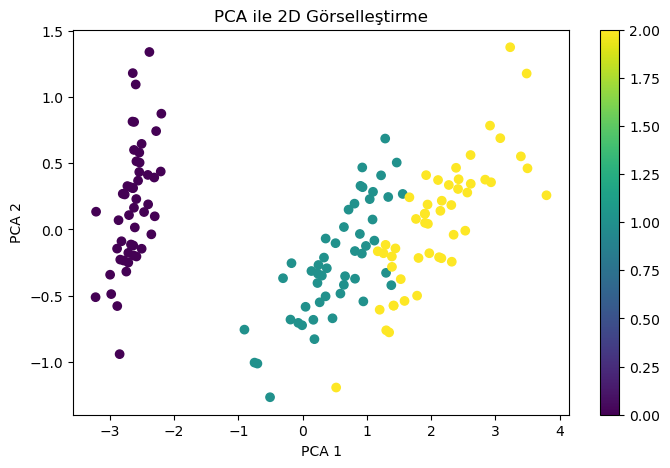

In [34]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

#veri
data = load_iris()
X = data.data
y = data.target

#PCA ile 2 boyuta indir
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#Görselleştir
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA ile 2D Görselleştirme')
plt.colorbar()
plt.show()

t-SNE Uygulamalı Örnek

C:\Users\esrao\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\esrao\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\esrao\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\esrao\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\esrao\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

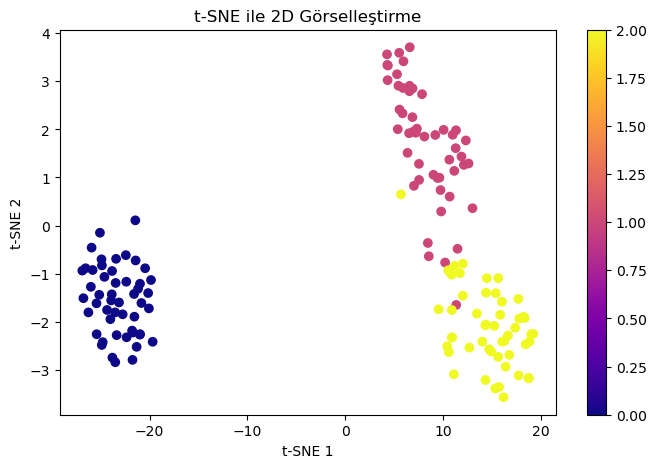

In [37]:
from sklearn.manifold import TSNE

#t-SNE ile indir
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

#Görselleştir
plt.figure(figsize=(8, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='plasma')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE ile 2D Görselleştirme')
plt.colorbar()
plt.show()

Ne Zaman Hangisini Kullanmalıyız?
| Durum                                    | Tercih |
| ---------------------------------------- | ------ |
| Hızlı ve anlaşılır sonuç istiyorsan      | PCA    |
| Karmaşık kümeleri ayırt etmek istiyorsan | t-SNE  |
| Modelden önce boyut azaltmak istiyorsan  | PCA    |
| Sadece görselleştirme istiyorsan         | t-SNE  |


PCA (Principal Component Analysis) - Ana Bileşen Analizi

Ne yapar? 
* Verideki değişkenliği (variance) en iyi şekilde temsil eden yeni eksenler (bileşenler) oluşturur.
* Bu bileşenlerle orijinal veri boyutunu düşürürken anlamlı bilgiyi korumaya çalışır.

PCA çıktıları nelerdir?
1. Explained Variance Ratio (Açıklanan Varyans Oranı)
   * [0.72, 0.23, 0.04, 0.01]
   * 1. bileşen verideki varyansın %72'sini açıklıyor.
   * 2. bileşen %23'ünü
   * Geri kalanlar çok az katkıda bulunuyor.
   * Bu durumda 2 bileşenle toplam %95 varyans korunuyor, yani veriyi 4 boyuttan 2 boyuta düşürmek mantıklı olur.
2. PCA ile Görselleştirme
   * 2D scatter plot varsa (PC1 vs PC2), gruplar arası ayrım olup olmadığına bakılır.
   * Sınıflar kümelenmişse, modelleme için iyi sinyaldir.

t-SNE (t-distributed Stochastic Neighbor Embedding)

Ne yapar?
* Özellikle karmaşık ve yüksek boyutlu verilerin görselleştirilmesi için çok uygundur.
* PCA gibi lineer değil, non-lineer ilişkileri de yakalar.
* Kümeleme yapısını daha net gösterir.

t-SNE çıktıları nelerdir?

Scatter Plot (t-SNE 2D Projeksiyonu)
   * Her noktada 1 gözlemi temsil eder, her renk sınıfları temsil eder.
   * Eğer:
     * Aynı sınıftaki örnekler birbirine yakınsa
     * Farklı sınıflar ayrı kümeler şeklindeyse

Bu çok güzel bir ayrım olduğunu ve modelin sınıfları öğrenebileceğini gösterir.

PCA mı t-SNE mi?
| Özellik                         | PCA        | t-SNE                        |
| ------------------------------- | ---------- | ---------------------------- |
| Temel yaklaşım                  | Lineer     | Non-lineer                   |
| Hızlı mı?                       | Çok hızlı  | Daha yavaş                   |
| Yorumlanabilir mi?              | Evet       | Hayır, açıklamak zordur      |
| Görselleştirme                  | Fena değil | 🔥 Harika                    |
| Modelleme öncesi kullanılır mı? | Evet       | Hayır (sadece görsel amaçlı) |

Özet:
* PCA: Boyut indirip modelde kullanabiliriz.
* t-SNE: Sadece görselleştirme için kullanabiliriz. (özellikle yüksek boyutlu ve karışık veride)

ROC ve PR (Precision-Recall) Eğrileri
* Sınıflandırma modellerinin performansını özellikle dengesiz veri setlerinde çok daha net anlamamıza yardımcı olur.

1. ROC Eğrisi (Receiver Operating Characteristic)

   Ne gösterir?
   * True Positive Rate (TPR) yani Duyarlılık / Recall
   * False Positive Rate (FPR) üzerinden modelin farklı eşiklerdeki başarısını gösterir

   Neden önemli?
   * Modelin farklı eşik değerlerindeki davranışını görürsün
   * Altındaki alan (AUC = Area Under Curve) modelin genel performansını özetler.
2. PR Eğrisi (Precision - Recall Curve)

    Ne gösterir?
   * Precision (kesinlik) ve Recall (duyarlılık) arasındaki ilişki
   * Özellikle dengesiz veri setlerinde daha doğru yorum yapmamıza olanak tanır.

Manuel ROC ve PR Eğrisi Çizimi (Örnek Kod)

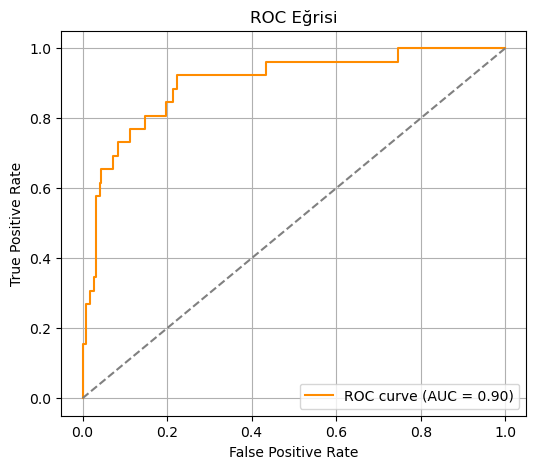

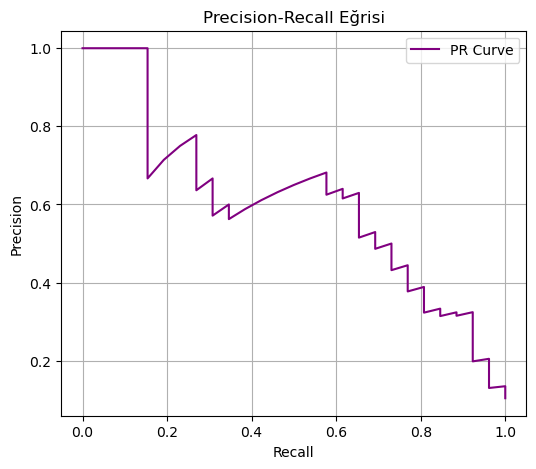

In [51]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve

#1. veriyi oluştur
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#2. modeli eğit
model = LogisticRegression()
model.fit(X_train, y_train)

#3. olasılık tahminlerini al
y_scores = model.predict_proba(X_test)[:, 1]

#4. ROC eğrisi
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi")
plt.legend()
plt.grid(True)
plt.show()

#5. PR eğrisi
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label="PR Curve", color="purple")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Eğrisi")
plt.grid(True)
plt.legend()
plt.show()

Yorumu nasıl yapılır?

ROC Eğrisi:
* AUC = 1: Mükemmel model
* AUC > 0.9: Çok iyi
* AUC ~ 0.5: Rastgele tahmin

PR Eğrisi:
* Eğri yukarıda ve sağdaysa: iyi model
* Düşük recall'da bile yüksek precision varsa: daha da iyi

Not: ROC ve PR eğrileri özellikle dengesiz sınıflı veri setlerinde çok şey anlatır. Eğer pozitif sınıf azsa (örneğin hastalık teşhis, dolandırıcılık vs.), PR eğrisi daha doğru kıyas sağlar.

AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

🧠 XGBoost, LightGBM: daha güçlü modeller (daha sonra geçilir)

na kadar çok sağlam bir 1. seviye ML temeli kurduk. Geri kalanlar daha çok:

Derinlemesine optimizasyon (örneğin XGBoost, CatBoost)

Model deployment (örneğin joblib, Flask)

Karmaşık projelerde kullanılacak gelişmiş teknikler
Bu noktada “güzel bir proje” yaparak bu bilgileri pekiştir.

Sonrasında “modellerin içini açma” (örneğin feature importance, SHAP, LIME gibi açıklanabilir yapay zeka) gibi konulara bakabilirsin.

XGBoost & LightGBM Nedir?

Bunlar aslında gradient boosting algoritmalarının gelişmiş versiyonlarıdr. 

Amaçları aynı: birçok zayıf tahminciden (karar ağaçları) güçlü model oluşturmak. 

Farkları ise daha hızlı, daha doğru ve daha esnek olmaları.

XGBoost (Extreme Gradient Boosting)
* En popüler boosting algoritmalarından biri.
* Ağaç tabanlı bir model.
* Overfitting'e karşı regularization (L1 ve L2 ceza) içerir.
* GPU desteklidir. (hızlı!)
* Kullanımı (xgboost paketinden):

In [ ]:
from xgboost import XGBClassifer

model = XGBClassifier()
model.fit(X_train, y_train)

LightGBM (Light Gradient Boosting Machine)
* Microsoft tarafından geliştirildi.
* Büyük veri setlerinde daha hızlı.
* XGBoost'tan farklı olarak veriyi önceden sıralayıp histogram çıkarır (daha hızlı ve az bellek).
* Özellikle çok fazla özelliği olan veri setlerinde çok başarılıdır.
* Kullanımı (lightgbm paketinden):

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
model.fit(X_train, y_train)

XGBoost vs LightGBM
| Özellik            | XGBoost    | LightGBM         |
| ------------------ | ---------- | ---------------- |
| Hız                | Orta       | Daha hızlı       |
| Bellek kullanımı   | Daha fazla | Daha az          |
| Performans         | Çok iyi    | Genelde daha iyi |
| GPU Desteği        | Var        | Var              |
| Büyük veri setleri | Uygun      | Çok uygun        |


Ne zaman kullanılmalı?
* Veri büyükse ve model yavaşsa: LightGBM
* Hassas ayarlarla yüksek performans gerekirse: XGBoost